<a href="https://colab.research.google.com/github/sejli/cse158as2/blob/main/cse158as2task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import string
import random
import string
from sklearn import linear_model
import csv
import random
import matplotlib.pyplot as plt

In [2]:
def readCSV(path):
    f = open(path)
    c = csv.reader(f)
    header = ['user_id', 'stream_id', 'streamer_username', 'time_start', 'time_stop']
    for l in c:
        d = dict(zip(header,l))
        yield d

In [3]:
# Load dataset and count the number of watched streams by each user
# Users are listed numerically in ascending order
dataset = []
for l in readCSV('100k_a.csv'):
  dataset.append(l)

In [60]:
# Number of rows in dataset
print('Number of rows in dataset')
len(dataset)

Number of rows in dataset


3051733

In [70]:
# Number of users and streamers
user_count = int(dataset[-1]['user_id'])
streamer_count = defaultdict(int)
stream_viewers = defaultdict(int)
stream_per_streamer = defaultdict(set)
streamer_per_stream = defaultdict()
for d in dataset:
  streamer_count[d['streamer_username']] += 1
  stream_viewers[d['stream_id']] += 1
  stream_per_streamer[d['streamer_username']].add(d['stream_id'])
  streamer_per_stream[d['stream_id']] = d['streamer_username']
print('Number of users:', user_count)
print('Number of streamers:', len(streamer_count))
print('Number of streams:', len(stream_viewers))

Number of users: 100000
Number of streamers: 162625
Number of streams: 739991


In [56]:
# Top 10 most popular streamers and number of views
most_popular = [(streamer_count[s], s) for s in streamer_count]
most_popular.sort(reverse = True)
streamer_ranks = defaultdict(int)
for i in range(len(most_popular)):
  streamer_ranks[most_popular[i][1]] = i + 1
print('Top 10 most popular streamers and number of views')
most_popular[:10]

Top 10 most popular streamers and number of views


[(45144, 'ninja'),
 (40136, 'tfue'),
 (27362, 'shroud'),
 (17633, 'riotgames'),
 (14590, 'sodapoppin'),
 (14047, 'nickmercs'),
 (13902, 'dakotaz'),
 (13186, 'asmongold'),
 (13039, 'summit1g'),
 (12547, 'esl_csgo')]

In [57]:
# 10 Least most popular streamers and number of views
print('10 Least most popular streamers and number of views')
most_popular[-10:]

10 Least most popular streamers and number of views


[(1, '02vitaly'),
 (1, '01_risk'),
 (1, '00kys'),
 (1, '00hoon'),
 (1, '00fero00'),
 (1, '007kingchannel'),
 (1, '002ivorkdorog'),
 (1, '001live'),
 (1, '0011am'),
 (1, '000aikia000')]

In [72]:
# Most streamed streamers
most_streamed = [(len(stream_per_streamer[s]), s) for s in streamer_count]
most_streamed.sort(reverse = True)
most_streamed_ranks = defaultdict(int)
for i in range(len(most_streamed)):
  most_streamed_ranks[most_streamed[i][1]] = i + 1
print('Most Streamed Streamers')
most_streamed[:10]

Most Streamed Streamers


[(358, 'luke4316live'),
 (207, 'armatvhs'),
 (168, 'yogscast'),
 (166, 'igromania'),
 (164, 'giannielee'),
 (162, 'trustedfate'),
 (158, 'imbadon123'),
 (151, 'sparktv_mtg'),
 (149, 'gantver1'),
 (141, 'speedgaming')]

In [75]:
# Most watched streams and streamer
most_streamed = [(stream_viewers[s], s, streamer_per_stream[s]) for s in stream_viewers]
most_streamed.sort(reverse = True)
most_streamed_ranks = defaultdict(int)
for i in range(len(most_streamed)):
  most_streamed_ranks[most_streamed[i][1]] = i + 1
print('Most watched stream, viewers, and stream')
most_streamed[:10]

Most watched stream, viewers, and stream


[(2123, '34265480032', 'tfue'),
 (1997, '34195155728', 'ninja'),
 (1836, '34254041488', 'tfue'),
 (1826, '34000965936', 'tfue'),
 (1771, '34401244464', 'ninja'),
 (1760, '34046930480', 'ninja'),
 (1673, '33997972624', 'ninja'),
 (1672, '34379640832', 'tfue'),
 (1576, '34185882352', 'tfue'),
 (1576, '34104883024', 'tfue')]

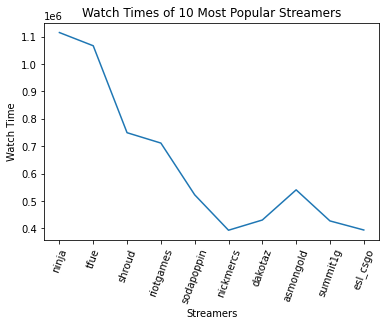

In [43]:
X = [d[1] for d in most_popular[:10]]
y = [watch_time[d[1]] for d in most_popular[:10]]
plt.plot(X, y)
plt.title('Watch Times of 10 Most Popular Streamers')
plt.xlabel('Streamers')
plt.ylabel('Watch Time')
plt.xticks(rotation=70)
plt.show()

In [38]:
# Highest watch time per streamer
watch_time = defaultdict(int)
for d in dataset:
  watch_time[d['streamer_username']] += ((int(d['time_stop']) - int(d['time_start'])) * 10)
most_watched = [(watch_time[s], s) for s in streamer_count]
most_watched.sort(reverse = True)
most_watched[:10]

[(1114940, 'ninja'),
 (1066720, 'tfue'),
 (749340, 'shroud'),
 (711480, 'riotgames'),
 (540700, 'asmongold'),
 (522600, 'sodapoppin'),
 (430590, 'dakotaz'),
 (427240, 'summit1g'),
 (407160, 'xqcow'),
 (394150, 'esl_csgo')]

In [58]:
# Highest average watch time per streamer
watch_time_avg = defaultdict(int)
for d in dataset:
  watch_time_avg[d['streamer_username']] += ((int(d['time_stop']) - int(d['time_start'])) * 10 / streamer_count[d['streamer_username']])
most_watched_avg = [(watch_time_avg[s], s) for s in streamer_count]
most_watched_avg.sort(reverse = True)
print('Highest average watch time per streamer')
most_watched_avg[:10]

Highest average watch time per streamer


[(520.0, 'mcmeanss'),
 (380.0, 'kerric'),
 (370.0, 'vituss_brutva'),
 (370.0, 'tcbails'),
 (370.0, 'pilki12'),
 (370.0, 'lord_kazari'),
 (360.0, 'konstrush'),
 (350.0, 'werzmybelt'),
 (350.0, 'truexinon1613'),
 (340.0, 'modeeper')]

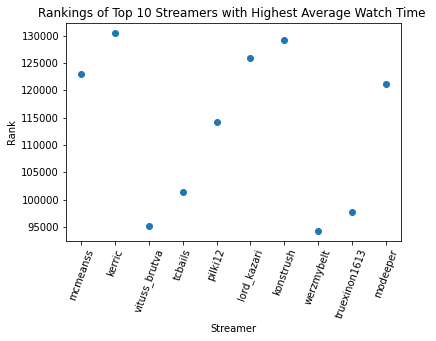

In [55]:
X = [d[1] for d in most_watched_avg[:10]]
y = [streamer_ranks[d[1]] for d in most_watched_avg[:10]]
plt.scatter(X, y)
plt.title('Rankings of Top 10 Streamers with Highest Average Watch Time ')
plt.xlabel('Streamer')
plt.ylabel('Rank')
plt.xticks(rotation=70)
plt.show()

In [59]:
len(dataset)

3051733